In [1]:
import pandas as pd

df = pd.read_excel("both db.xlsx", sheet_name="winter")


In [3]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  428 non-null    object 
 1   PSSRa    428 non-null    float64
 2   PSSRb    428 non-null    float64
 3   RARSc    428 non-null    float64
 4   PSSRc    428 non-null    float64
 5   CARI     428 non-null    float64
 6   NDVI705  428 non-null    float64
 7   PSNDa    428 non-null    float64
 8   YI       428 non-null    float64
 9   RES      428 non-null    float64
 10  PRI      428 non-null    float64
 11  NDVIa    428 non-null    float64
 12  NDVIb    428 non-null    float64
dtypes: float64(12), object(1)
memory usage: 43.6+ KB


,PSSRa,PSSRb,RARSc,PSSRc,CARI,NDVI705,PSNDa,YI,RES,PRI,NDVIa,NDVIb
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,6.543619,5.620592,5.304991,5.334307,1.546201,0.375749,0.723548,-0.006906,0.458833,0.019559,0.719142,0.717931
std,1.628837,1.258628,1.131066,1.150535,0.353665,0.061755,0.054434,0.003506,0.062412,0.018534,0.054564,0.055066
min,3.620865,3.185210,3.038123,3.019753,0.736208,0.217123,0.567181,-0.016645,0.342576,-0.057982,0.562577,0.560911
25%,5.392493,4.747126,4.540540,4.555959,1.296024,0.332685,0.687133,-0.009161,0.414249,0.009887,0.682558,0.680949
50%,6.157062,5.470272,5.153627,5.168651,1.513292,0.370879,0.720556,-0.007350,0.447663,0.024525,0.715053,0.716009
75%,7.395219,6.387661,5.971130,6.062102,1.757582,0.420837,0.761769,-0.005534,0.494723,0.033363,0.757949,0.757302
max,12.239014,10.427906,9.524077,9.581117,2.758396,0.525403,0.848931,0.009570,0.622536,0.054443,0.846015,0.845393


Free attempt - all indices - straightforward

Accuracy: 0.3023255813953488


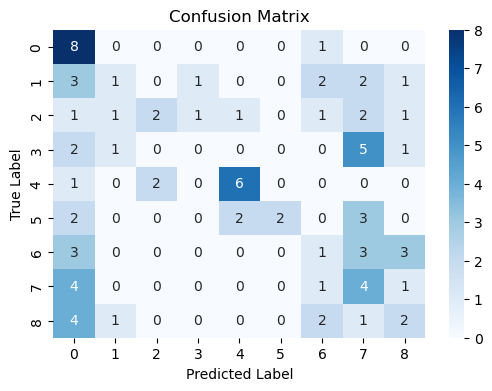

             AVEFA     Barley      ECHCG   Oat      PAPRO      POLAV  \
AVEFA    88.888889   0.000000   0.000000   0.0   0.000000   0.000000   
Barley   30.000000  10.000000   0.000000  10.0   0.000000   0.000000   
ECHCG    10.000000  10.000000  20.000000  10.0  10.000000   0.000000   
Oat      22.222222  11.111111   0.000000   0.0   0.000000   0.000000   
PAPRO    11.111111   0.000000  22.222222   0.0  66.666667   0.000000   
POLAV    22.222222   0.000000   0.000000   0.0  22.222222  22.222222   
Wheat D  30.000000   0.000000   0.000000   0.0   0.000000   0.000000   
Wheat I  40.000000   0.000000   0.000000   0.0   0.000000   0.000000   
Wheat S  40.000000  10.000000   0.000000   0.0   0.000000   0.000000   

           Wheat D    Wheat I    Wheat S  
AVEFA    11.111111   0.000000   0.000000  
Barley   20.000000  20.000000  10.000000  
ECHCG    10.000000  20.000000  10.000000  
Oat       0.000000  55.555556  11.111111  
PAPRO     0.000000   0.000000   0.000000  
POLAV     0.000000  3

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'species' is the target column:
X = df.drop("species", axis=1)  # Features
y = df["species"]               # Target

from sklearn.preprocessing import StandardScaler

# Assuming X is your features DataFrame or NumPy array
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now you can use X_scaled in your models instead of X

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Initialize and train the SVM classifier
# Here we use the RBF kernel; adjust 'C' and 'kernel' as needed
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train, y_train)

# Evaluate the model
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)

# Compute and plot the confusion matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute confusion matrix percentages for a detailed view
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print(cm_df)


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
# Generate classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

KNN Classification Report:
              precision    recall  f1-score   support

       AVEFA       0.29      0.89      0.43         9
      Barley       0.25      0.10      0.14        10
       ECHCG       0.50      0.20      0.29        10
         Oat       0.00      0.00      0.00         9
       PAPRO       0.67      0.67      0.67         9
       POLAV       1.00      0.22      0.36         9
     Wheat D       0.12      0.10      0.11        10
     Wheat I       0.20      0.40      0.27        10
     Wheat S       0.22      0.20      0.21        10

    accuracy                           0.30        86
   macro avg       0.36      0.31      0.28        86
weighted avg       0.36      0.30      0.27        86



In [8]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Example species lists for each category
monocot_species = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat", "AVEFA", "ECHCG"]
dicot_species   = ["PAPRO", "POLAV"]
weed_species    = ["AVEFA", "PAPRO", "POLAV", "ECHCG"]
crop_species    = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat"]

# Third-level species groups (adjust as needed)
monocot_weed_species = ["AVEFA", "ECHCG"]
monocot_crop_species = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat"]
dicot_weed_species   = ["PAPRO", "POLAV"]

# Assume df is your main DataFrame with features and a 'species' column.
# Create first-level and second-level categories.
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Select features and target for level 1.
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI","PSNDa", "YI", "NDVI705", "RES", "PRI","NDVIa","NDVIb"]]
y_cat1 = df["category1"]
from sklearn.preprocessing import StandardScaler

# Assuming X is your features DataFrame or NumPy array
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now you can use X_scaled in your models instead of X


# Level 1: Monocot vs. Dicot classification using SVM.
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = SVC(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)
y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1.
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

# Level 2 for Monocots: Train weed vs. crop classifier.
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]
X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(
    X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = SVC(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

# Level 2 for Dicots:
# Check if there is any crop data among dicots.
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]
if (y_dicot == 'crop').sum() > 0:
    X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(
        X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
    clf_cat2_dicot = SVC(random_state=42)
    clf_cat2_dicot.fit(X_train_di, y_train_di)
else:
    # If no dicot crop data, set level 2 for dicots to always predict 'weed'
    clf_cat2_dicot = None

# Level 3: Species-level classification models.
# Monocot-Weed model.
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]
clf_mono_weed = SVC(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model.
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]
clf_mono_crop = SVC(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model.
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]
clf_dicot_weed = SVC(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model: Train only if any dicot crop data exists.
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
if dicot_crop_mask.sum() > 0:
    X_dicot_crop = X[dicot_crop_mask]
    y_dicot_crop = df['species'][dicot_crop_mask]
    clf_dicot_crop = SVC(random_state=42)
    clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)
else:
    clf_dicot_crop = None

# Final species prediction using the hierarchical approach.
final_species_preds = []

for idx in X_test_cat1.index:
    # Level 1: Predict monocot/dicot.
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    
    if cat1_pred == 'monocot':
        # Level 2 (monocot): Use classifier to decide weed vs. crop.
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        # Level 2 (dicot): If classifier exists, use it; otherwise, default to 'weed'.
        if clf_cat2_dicot is not None:
            cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]
        else:
            cat2_pred = 'weed'
        # Level 3: Use dicot model based on level 2 decision.
        if cat2_pred == 'weed' or clf_dicot_crop is None:
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]
    
    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate final species-level accuracy.
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

# Optionally, display the confusion matrix (in percentages).
cm = confusion_matrix(y_test_species, final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test_species)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print(cm_df)


Final Species-Level Accuracy: 0.26744186046511625
         AVEFA  Barley      ECHCG  Oat      PAPRO  POLAV    Wheat D  \
AVEFA      0.0     0.0   0.000000  0.0   0.000000    0.0  88.888889   
Barley     0.0     0.0   0.000000  0.0   0.000000    0.0  42.857143   
ECHCG      0.0     0.0  25.000000  0.0  25.000000    0.0  12.500000   
Oat        0.0     0.0   0.000000  0.0   0.000000    0.0  27.272727   
PAPRO      0.0     0.0  36.363636  0.0  36.363636    0.0   0.000000   
POLAV      0.0     0.0   0.000000  0.0  37.500000    0.0  25.000000   
Wheat D    0.0     0.0   0.000000  0.0   0.000000    0.0  50.000000   
Wheat I    0.0     0.0   0.000000  0.0   0.000000    0.0  11.111111   
Wheat S    0.0     0.0   0.000000  0.0   0.000000    0.0  60.000000   

           Wheat I    Wheat S  
AVEFA     0.000000  11.111111  
Barley   42.857143  14.285714  
ECHCG    12.500000  25.000000  
Oat      36.363636  36.363636  
PAPRO    27.272727   0.000000  
POLAV    25.000000  12.500000  
Wheat D  27.777

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
# Generate classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test_species, final_species_preds, zero_division=0))

KNN Classification Report:
              precision    recall  f1-score   support

       AVEFA       0.00      0.00      0.00         9
      Barley       0.00      0.00      0.00         7
       ECHCG       0.33      0.25      0.29         8
         Oat       0.00      0.00      0.00        11
       PAPRO       0.44      0.36      0.40        11
       POLAV       0.00      0.00      0.00         8
     Wheat D       0.30      0.50      0.37        18
     Wheat I       0.25      0.67      0.36         9
     Wheat S       0.12      0.40      0.18         5

    accuracy                           0.27        86
   macro avg       0.16      0.24      0.18        86
weighted avg       0.18      0.27      0.20        86

